# Taller 7
Métodos Computacionales para Políticas Públicas - URosario

**Entrega: viernes 23-oct-2020 11:59 PM**

<div class="alert alert-success">

**[Ivonne Paola Ubaque Galán]** <br><br>

[ivonne.ubaque@urosario.edu.co]
</div>

## Instrucciones:
- Guarde una copia de este *Jupyter Notebook* en su computador, idealmente en una carpeta destinada al material del curso.
- Modifique el nombre del archivo del *notebook*, agregando al final un guión inferior y su nombre y apellido, separados estos últimos por otro guión inferior. Por ejemplo, mi *notebook* se llamaría: mcpp_taller7_santiago_matallana
- Marque el *notebook* con su nombre y e-mail en el bloque verde arriba. Reemplace el texto "[Su nombre acá]" con su nombre y apellido. Similar para su e-mail.
- Desarrolle la totalidad del taller sobre este *notebook*, insertando las celdas que sea necesario debajo de cada pregunta. Haga buen uso de las celdas para código y de las celdas tipo *markdown* según el caso.
- Recuerde salvar periódicamente sus avances.
- Cuando termine el taller:
    1. Descárguelo en PDF. Si tiene algún problema con la conversión, descárguelo en HTML.
    2. Suba todos los archivos a su repositorio en GitHub, en una carpeta destinada exclusivamente para este taller, antes de la fecha y hora límites.

(Todos los ejercicios tienen el mismo valor.)

---

En este taller exploraremos los datos de crimen de Chicago. 

Descargue los datos de crimen del Chicago Data Portal solo para el año 2015 (https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-present/ijzp-q8t2/data).

---

### 1.
Calcule el número de crímenes en cada Community Area en 2015. Haga un gráfico de barras que lo ilustre.

In [4]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib as mpl


In [5]:
file = "Crimes_Chicago-2015.csv"
crimes = pd.read_csv(file)

crimes .head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,11861892,JC474163,01/01/2015 12:00:00 AM,021XX E 84TH ST,0266,CRIM SEXUAL ASSAULT,PREDATORY,RESIDENCE,False,False,...,7.0,46,02,NaN,NaN,2015,10/16/2019 04:15:04 PM,NaN,NaN,NaN
1,9993839,HY183887,01/01/2015 12:00:00 AM,068XX S PAULINA ST,1541,OBSCENITY,SALE/DIST OBSCENE MAT TO MINOR,RESIDENCE,False,True,...,17.0,67,26,1166188.0,1859423.0,2015,10/10/2019 04:11:30 PM,41.769832,-87.666383,"(41.769832073, -87.666382614)"
2,11028448,JA360336,01/01/2015 12:00:00 AM,051XX W HURON ST,0281,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,APARTMENT,True,True,...,37.0,25,02,NaN,NaN,2015,09/02/2019 03:57:18 PM,NaN,NaN,NaN
3,11116187,JA463360,01/01/2015 12:00:00 AM,033XX W CRYSTAL ST,1752,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,True,...,26.0,23,17,NaN,NaN,2015,08/28/2019 04:08:10 PM,NaN,NaN,NaN
4,11800937,JC400566,01/01/2015 12:00:00 AM,110XX S INDIANA AVE,1130,DECEPTIVE PRACTICE,FRAUD OR CONFIDENCE GAME,RESIDENCE,False,False,...,9.0,49,11,NaN,NaN,2015,08/21/2019 04:26:07 PM,NaN,NaN,NaN


In [7]:
len (crimes)

263652

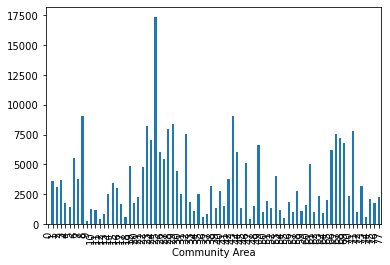

In [8]:
crimes_by_community = crimes.groupby('Community Area')

crimes_by_community.groups

community_crime_count = crimes_by_community['ID'].agg('count')
community_crime_count.to_frame()

community_crime_count.plot(kind='bar');

## se importan las bibliotecas necesarias para el desarrollo del ejercicio

In [9]:
crimes_by_community = crimes.groupby('Community Area')
crimes_by_community.groupscommunity_crime_count=crimes_by_community['ID'].agg('count')
community_crime_count.to_frame()

,ID
Community Area,
0,2
1,3584
2,3109
3,3654
4,1766
...,...
73,3159
74,618
75,2084


### 2.
Ordene las Community Areas de acuerdo con el número de crímenes. ¿Qué Community Area (por nombre, idealmente) presenta el mayor número de crímenes? ¿El menor?

In [13]:
table = community_crime_count.to_frame()

by_intensidad = table.sort_values('ID' , ascending =False)
by_intensidad.head(10)

##Se hace uso del método sort (booleano)
## con el parámetro ascending de True el orden es creciente.

,ID
Community Area,
25,17367
43,9077
8,9051
29,8407
23,8194
28,7930
71,7834
32,7574
67,7530


In [14]:
## Y con el parámetro False, el orden es decreciente.
by_intensidad = table.sort_values('ID',ascending=False)
by_intensidad.head(10)

,ID
Community Area,
25,17367
43,9077
8,9051
29,8407
23,8194
28,7930
71,7834
32,7574
67,7530


### De esta forma se tiene que las community áreas con mayor y menorintensidaddedelictividadsonAustin(áreanúmero25)con17367 y Edison Park (número 9) con 258 delitos,respectivamente.

### 3.
Cree una tabla cuyas filas sean días del año (yyyy-mm-dd) y las columnas las 77 Community Areas. En cada campo de la tabla deberá haber el correspondiente número de crímenes. Seleccione algunas Community Areas que le llamen la atención y haga un gráfico de serie de tiempo.

Pista: El siguiente código puede serle útil.

In [ ]:
# Create function to strip time from date field, and use it to create another column
def to_day(timestamp):
    return timestamp.replace(minute=0,hour=0, second=0)

crimes['Day'] = crimes['Date'].apply(to_day)

In [15]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib as mpl

file = "Crimes_Chicago-2015.csv"
crimes = pd.read_csv(file, error_bad_lines=False,sep=',',)
crimes.head()
crimes.shape

(263652, 22)

In [16]:
import datetime
def to_day(timestamp):
    timestamp = timestamp.split(" ")[0]
    timestamp = datetime.datetime.strptime(timestamp,"%m/%d/%Y")
    return timestamp.replace(minute=0, hour=0, second=0)

In [17]:
crimes["Day"] = crimes["Date"].apply(to_day)

In [18]:
crimes_by_community = crimes.groupby(['Community Area', 'Day'])
crimes_by_community = crimes_by_community

In [19]:
crimes_by_community.groups
community_crime_count = crimes_by_community['ID'].agg('count')
table = community_crime_count.to_frame()

by_year = table.sort_values('ID' , ascending =False)
by_year.head(10)

ID
Community Area Day           
25             2015-01-01  94
               2015-11-01  84
               2015-06-01  83
               2015-07-05  74
               2015-07-27  73
               2015-08-16  72
32             2015-08-01  71
6              2015-06-28  71
25             2015-04-12  69
               2015-03-20  66

### 4.

Descargue la base de datos de información socioeconómica (https://data.cityofchicago.org/Health-Human-Services/Census-Data-Selected-socioeconomic-indicators-in-C/kn9c-c2s2).

Cree una tabla que agregue el número de crímenes por Community Area. Una esa tabla con la de datos socioeconómicos y cree un "scatter plot" de número de crímenes vs ingreso per cápita. Explique la relación en palabras.

In [20]:
file = "Crimes_Chicago-2015.csv"
crimes = pd.read_csv(file)
crimes .head()

file = "Socioeconomic_Chicago.csv"
SocioEco = pd.read_csv(file)
SocioEco.head(10) 

crimes_by_community = crimes.groupby('Community Area')
crimes_by_community.groups

community_crime_count = crimes_by_community['ID'].agg('count')
community_crime_count.to_frame()

,ID
Community Area,
0,2
1,3584
2,3109
3,3654
4,1766
...,...
73,3159
74,618
75,2084


---